In [1]:
#Task 1: Data Retrieving

# explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

breastcancer_filename = 'breast-cancer-wisconsin.csv'
# load the data
breastcancer = pd.read_csv(breastcancer_filename, engine='python',
                        index_col=0, # the first column is ID needs to be excluded to prevent data leakage
                        )

# checking equivalent to original data
breastcancer.head()
# the last column looks undefined by the UCI data source- , just ignore it - doublecheked it's unmerged empty cells on the csv, doesn't affect the data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# summary of dataset types to know which ones to check
breastcancer.info()
# there are no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [3]:
# check for zero values in columns
(breastcancer == 0).sum(axis=0)
# concavity_mean, concave points_mean, concavity_se, concave points_se, concavity_worst and concave points_worst 
# have 13 zero values each, which need to be filled. I will use mean values as replacement

diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
Unnamed: 32                 0
dtype: int64

In [4]:
# checking concavity_mean column
# there are 13 values that are 0. These values are impossible
concavity_meanmean = breastcancer['concavity_mean'].mean()
# replace impossible values with mean
breastcancer['concavity_mean'].replace({0:concavity_meanmean}, inplace=True)
# concavity_mean cleaned

In [5]:
# checking concave points_mean
# there are 13 values that are 0. These values are impossible
concavepoints_meanmean = breastcancer['concave points_mean'].mean()
# replace impossible values with mean
breastcancer['concave points_mean'].replace({0:concavepoints_meanmean}, inplace=True)
# concave points_mean cleaned

In [6]:
# checking concavity_se
# there are 13 values that are 0. These values are impossible
concavity_se_mean = breastcancer['concavity_se'].mean()
# replace impossible values with mean
breastcancer['concavity_se'].replace({0:concavity_se_mean}, inplace=True)
# concavity_se cleaned

In [7]:
# checking concave points_se  
concavepoints_semean = breastcancer['concave points_se'].mean()
# replace impossible values with mean
breastcancer['concave points_se'].replace({0:concavepoints_semean}, inplace=True)
# concave points_se cleaned

In [8]:
# checking concavity_worst 
concavity_worstmean = breastcancer['concavity_worst'].mean()
# replace impossible values with mean
breastcancer['concavity_worst'].replace({0:concavity_worstmean}, inplace=True)
# concavity_worst cleaned

In [9]:
# checking concave points_worst  
concavepoints_worstmean = breastcancer['concave points_worst'].mean()
# replace impossible values with mean
breastcancer['concave points_worst'].replace({0:concavepoints_worstmean}, inplace=True)
# concavepoints_worst cleaned

In [10]:
# check if cleaned dataset still contains zero values in columns
(breastcancer == 0).sum(axis=0)
# cleaned 

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64

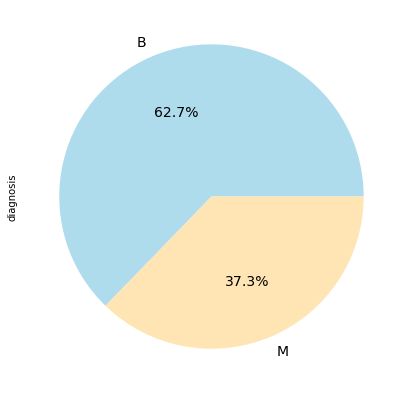

In [11]:
# Task 2: Data Exploration
# picked 10 columns 
# checking diagnosis column categorical attributes
# visualising the proportion of benign vs malignant breast tumours 
breastcancer['diagnosis']\
    .value_counts() \
    .plot(kind='pie', autopct='%1.1f%%',figsize=(7,7), fontsize=14,
         colors=["#AFDCEC","#FFE5B4"],)
plt.show()

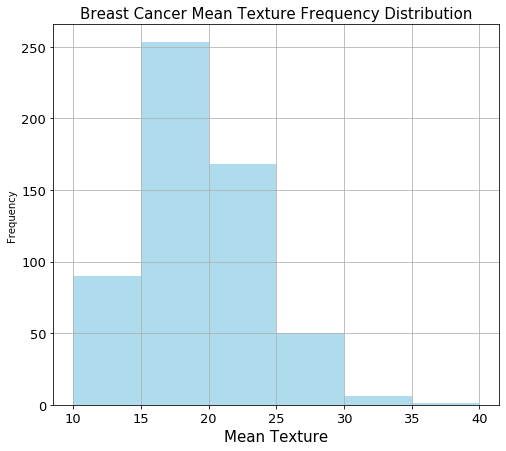

In [12]:
# the following 9 variables are all interval / ratio so I decided histograms are the best to compare them and visualise skew
# checking texture_mean spread with histo
breastcancer['texture_mean'].plot(kind='hist',figsize=(8,7), bins=[10,15,20,25,30,35,40],fontsize=13,color=('#AFDCEC'))
plt.title('Breast Cancer Mean Texture Frequency Distribution', fontsize=15)
plt.xlabel('Mean Texture', fontsize=15)
plt.grid()
plt.show()

In [13]:
# calculating median of mean texture
breastcancer['texture_mean'].median()

18.84

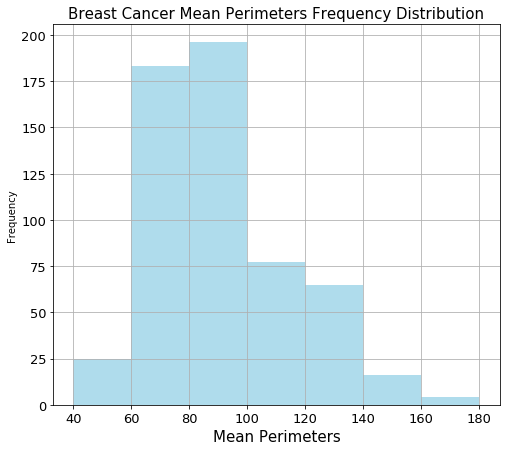

In [14]:
# checking the perimeter_mean range with histogram plot
breastcancer['perimeter_mean'].plot(kind='hist', bins=[40,60,80,100,120,140,160,180], figsize=(8,7), fontsize=13,color=('#AFDCEC'))
plt.title('Breast Cancer Mean Perimeters Frequency Distribution', fontsize=15)
plt.xlabel('Mean Perimeters', fontsize=15)
plt.grid()
plt.show()

In [15]:
# calculating median of mean perimeter
breastcancer['perimeter_mean'].median()

86.24

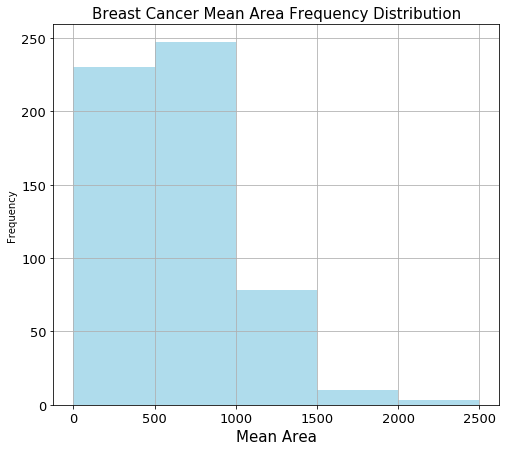

In [16]:
# checking area_mean range with histogram
breastcancer['area_mean'].plot(kind='hist',bins=[0,500,1000,1500,2000,2500],figsize=(8,7), fontsize=13,color=('#AFDCEC'))
plt.title('Breast Cancer Mean Area Frequency Distribution', fontsize=15)
plt.xlabel('Mean Area', fontsize=15)
plt.grid()
plt.show()

In [17]:
# calculating median of mean area
breastcancer['area_mean'].median()

551.1

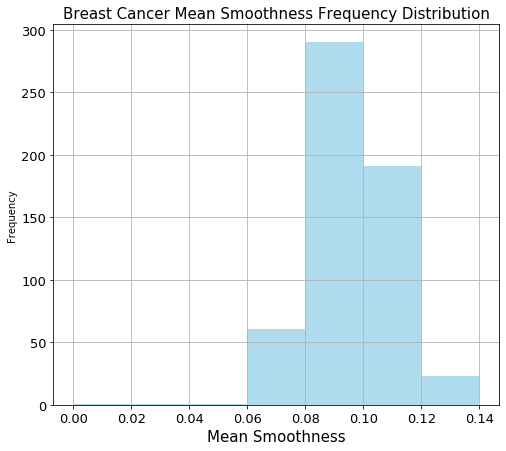

In [18]:
# checking smoothness mean
breastcancer['smoothness_mean'].plot(kind='hist',figsize=(8,7), bins=[0,0.06,0.08,0.10,0.12,0.14], fontsize=13,color=('#AFDCEC'))
plt.title('Breast Cancer Mean Smoothness Frequency Distribution', fontsize=15)
plt.xlabel('Mean Smoothness', fontsize=15)
plt.grid()
plt.show()

In [19]:
# calculating mean of mean smoothness
breastcancer['smoothness_mean'].mean()

0.096360281195079

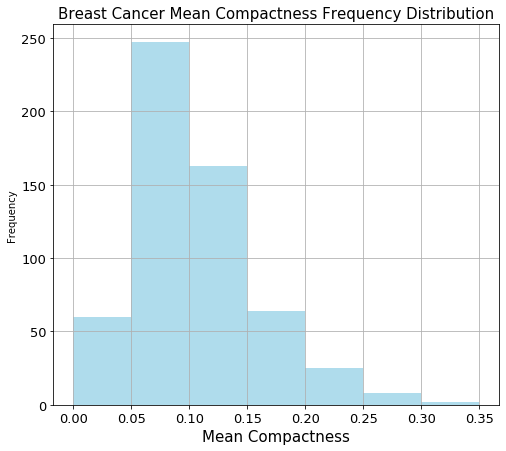

In [20]:
# checking compactness mean
breastcancer['compactness_mean'].plot(kind='hist',figsize=(8,7), fontsize=13, bins=[0, 0.05,0.1,0.15,0.2,0.25,0.3,0.35], color=('#AFDCEC'))
plt.title('Breast Cancer Mean Compactness Frequency Distribution', fontsize=15)
plt.xlabel('Mean Compactness', fontsize=15)
plt.grid()
plt.show()

In [21]:
# calculating median of mean compactness
breastcancer['compactness_mean'].median()

0.09262999999999999

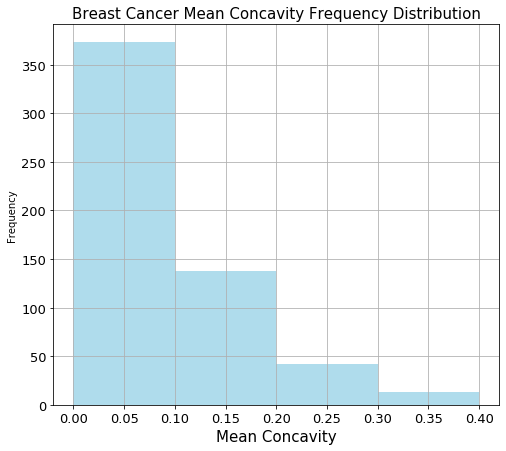

In [22]:
# checking concavity mean
breastcancer['concavity_mean'].plot(kind='hist',figsize=(8,7), bins=[0,0.1,0.2,0.3,0.4],fontsize=13,color=('#AFDCEC'))
plt.title('Breast Cancer Mean Concavity Frequency Distribution', fontsize=15)
plt.xlabel('Mean Concavity', fontsize=15)
plt.grid()
plt.show()

In [23]:
# calculating mode of mean concavity
breastcancer["concavity_mean"].mode()

0    0.088799
dtype: float64

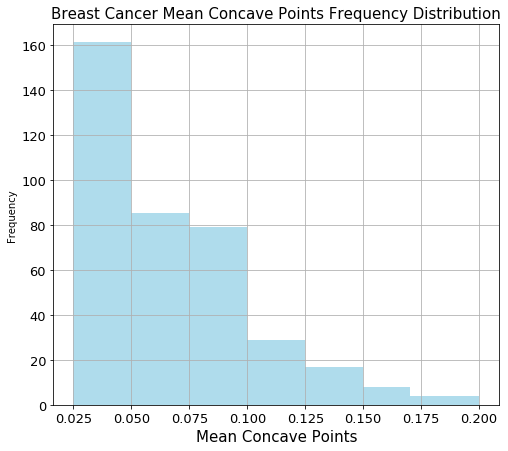

In [24]:
# checking concave points mean
breastcancer['concave points_mean'].plot(kind='hist',figsize=(8,7),bins=[0.025,0.05,0.075,0.1,0.125,0.15,0.17,0.2],fontsize=13,color=('#AFDCEC'))
plt.title('Breast Cancer Mean Concave Points Frequency Distribution', fontsize=15)
plt.xlabel('Mean Concave Points', fontsize=15)
plt.grid()
plt.show()

In [25]:
# calculating median of mean concave points
breastcancer['concave points_mean'].median()

0.037000000000000005

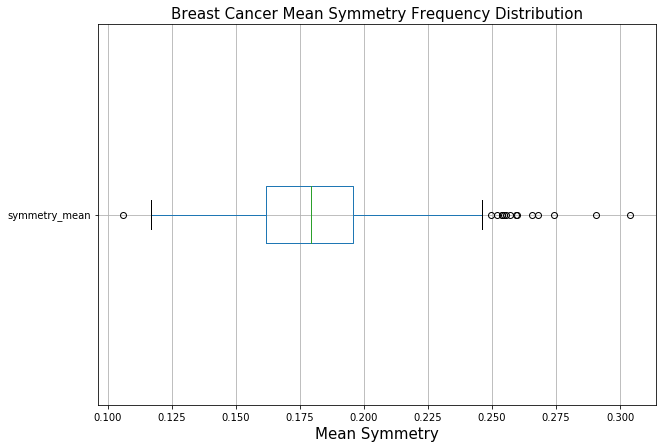

In [26]:
# checking symmetry mean
breastcancer.boxplot(column='symmetry_mean', figsize=(10,7), vert=False)
plt.title('Breast Cancer Mean Symmetry Frequency Distribution', fontsize=15)
plt.xlabel('Mean Symmetry', fontsize=15)
plt.show()

In [27]:
# calculating mean of mean symmetry
breastcancer['symmetry_mean'].mean()

0.181161862917399

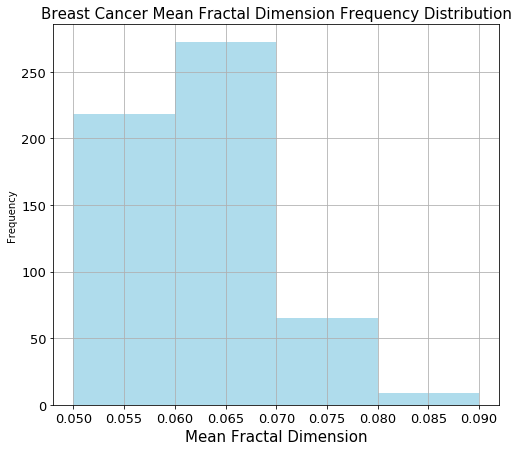

In [28]:
# checking fractal dimensions mean
breastcancer['fractal_dimension_mean'].plot(kind='hist',figsize=(8,7),bins=[0.05, 0.06, 0.07, 0.08, 0.09],fontsize=13,color=('#AFDCEC'))
plt.title('Breast Cancer Mean Fractal Dimension Frequency Distribution', fontsize=15)
plt.xlabel('Mean Fractal Dimension', fontsize=15)
plt.grid()
plt.show()

In [29]:
# calculating median of mean fractal dimension
breastcancer['fractal_dimension_mean'].median()

0.06154

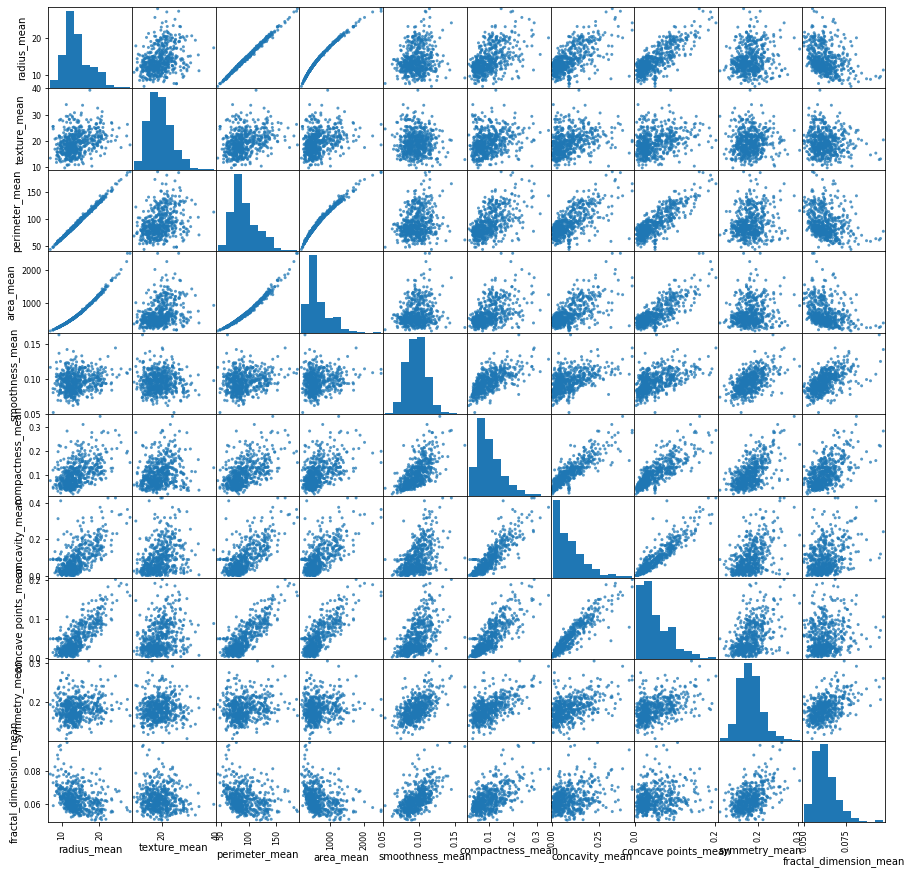

In [30]:
# exploring all possible relationship combinations
# Scatter matrix for numerical columns excluding object values. I picked to visualise these 10 variables only as the rest seemed redundant
numeric_columns = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                   'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',]
#make scatter matrix of numeric columns
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(breastcancer[numeric_columns], alpha=0.75, figsize=(15,15),
                           diagonal='hist')
plt.show()

In [31]:
# picked 10 interesting combinations that have observable correlations:
# radius/perimetermean, radius/areamean, perimetermean/areamean, concavepointsmean/concavitymean, concavepointsmean/radius,
# areamean/fractaldimensionmean, #compactnessmean/concavitymean, concavepointsmean/areamean, concavepoints/smoothness, 
# smoothness/symmetry
# replot them into separate scatter plots to visualise relationships more clearly

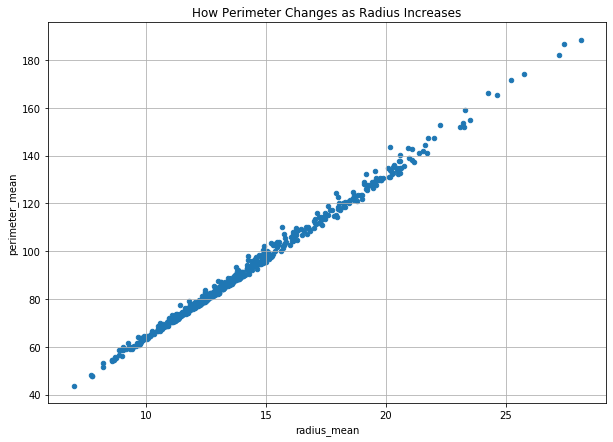

In [32]:
# scatter plot for radius and perimeter
breastcancer.plot(kind='scatter', grid=False,
               x='radius_mean', y='perimeter_mean', figsize=(10,7))
plt.title('How Perimeter Changes as Radius Increases')
plt.grid()
plt.show()

In [33]:
# import stats module from scipy in numpy
from scipy import stats

In [34]:
# first number is correlation coefficient r, second number is p value for when r=0
# correlation coefficient +1 means strong positive correlation
# -1 is strong negative correlation
# 0 is no correlation. first mention is y variable, second is x variable
stats.pearsonr(breastcancer['perimeter_mean'], breastcancer['radius_mean'])

(0.9978552814938108, 0.0)

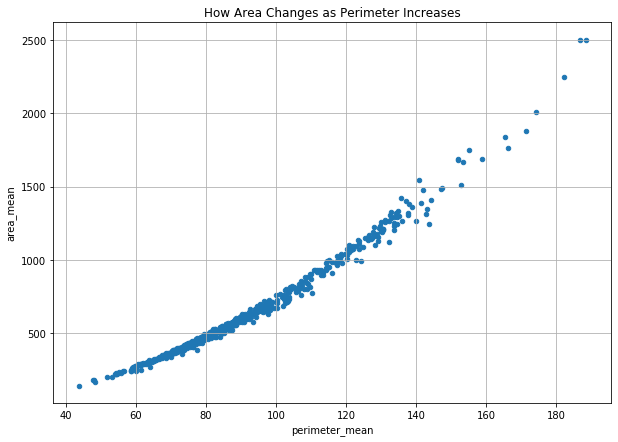

In [35]:
# scatter plot for perimeter and area
breastcancer.plot(kind='scatter', grid=False,
               x='perimeter_mean', y='area_mean', figsize=(10,7))
plt.title('How Area Changes as Perimeter Increases')
plt.grid()
plt.show()

In [36]:
stats.pearsonr(breastcancer['area_mean'], breastcancer['perimeter_mean'])

(0.9865068039913903, 0.0)

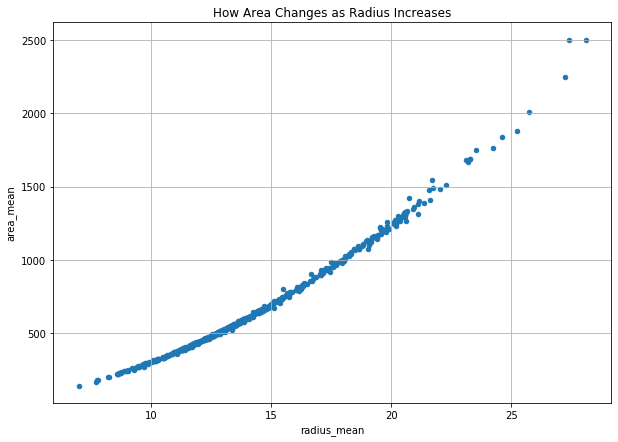

In [37]:
# scatter plot for radius and area
breastcancer.plot(kind='scatter', grid=False,
               x='radius_mean', y='area_mean', figsize=(10,7))
plt.title('How Area Changes as Radius Increases')
plt.grid()
plt.show()
#tumours are not completely spherical in shape or exponential due to radius squared

In [38]:
# correlation coefficient +1 means strong positive correlation
# -1 is strong negative correlation
# 0 is no correlation. first mention is y variable, second is x variable
stats.pearsonr(breastcancer['area_mean'], breastcancer['radius_mean'])

(0.9873571700566124, 0.0)

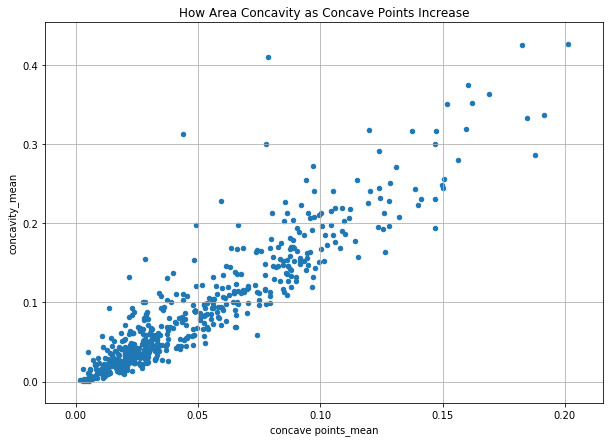

In [39]:
# concave points vs concavity scatter plot
breastcancer.plot(kind='scatter', grid=False,
               x='concave points_mean', y='concavity_mean', figsize=(10,7))
plt.title('How Area Concavity as Concave Points Increase')
plt.grid()
plt.show()

In [40]:
# correlation coefficient
stats.pearsonr(breastcancer['concavity_mean'], breastcancer['concave points_mean'])

(0.9189668467742591, 2.61235054073417e-231)

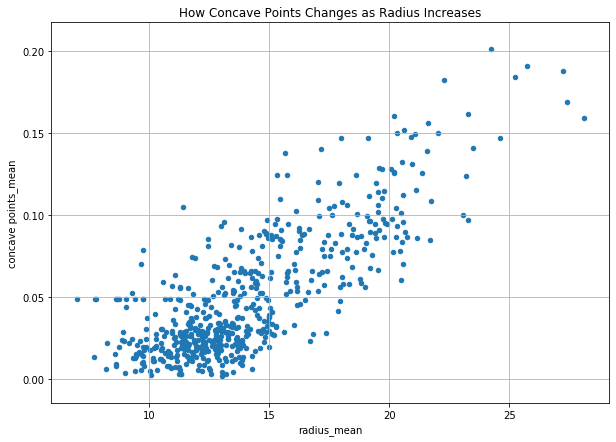

In [41]:
# concave points vs radius scatter plot
breastcancer.plot(kind='scatter', grid=False,
               x='radius_mean', y='concave points_mean', figsize=(10,7))
plt.title('How Concave Points Changes as Radius Increases')
plt.grid()
plt.show()

In [42]:
stats.pearsonr(breastcancer['concave points_mean'], breastcancer['radius_mean'])

(0.7989162930661342, 2.660580144071735e-127)

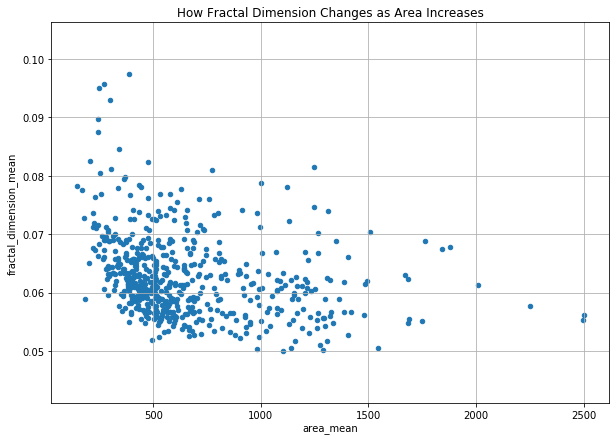

In [43]:
# fractal dimension vs area scatter plot
breastcancer.plot(kind='scatter', grid=False,
               x='area_mean', y='fractal_dimension_mean', figsize=(10,7))
plt.title('How Fractal Dimension Changes as Area Increases')
plt.grid()
plt.show()

In [44]:
stats.pearsonr(breastcancer['fractal_dimension_mean'], breastcancer['area_mean'])

(-0.28310981169142624, 6.0015219335930026e-12)

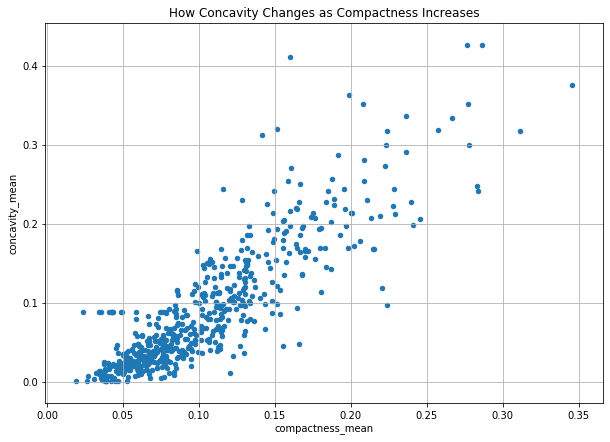

In [45]:
#compactnessmean/concavitymean scatter plot
breastcancer.plot(kind='scatter', grid=False,
               x='compactness_mean', y='concavity_mean', figsize=(10,7))
plt.title('How Concavity Changes as Compactness Increases')
plt.grid()
plt.show()

In [46]:
stats.pearsonr(breastcancer['concavity_mean'], breastcancer['compactness_mean'])

(0.8682025436742196, 1.067633028039062e-174)

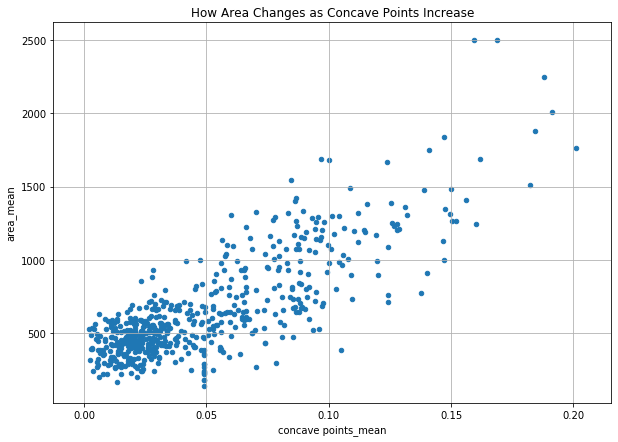

In [47]:
# concavepointsmean/areamean scatter plot
breastcancer.plot(kind='scatter', grid=False,
               x='concave points_mean', y='area_mean', figsize=(10,7))
plt.title('How Area Changes as Concave Points Increase')
plt.grid()
plt.show()

In [48]:
stats.pearsonr(breastcancer['area_mean'], breastcancer['concave points_mean'])

(0.807413013228707, 4.841344301891014e-132)

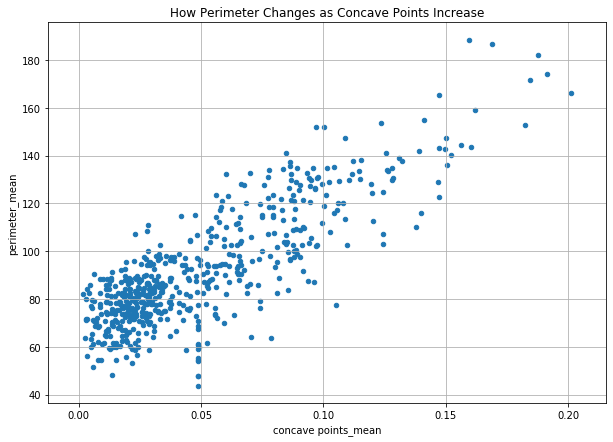

In [49]:
# concavepoints/perimetermean scatter plot
breastcancer.plot(kind='scatter', grid=False,
               x='concave points_mean', y='perimeter_mean', figsize=(10,7))
plt.title('How Perimeter Changes as Concave Points Increase')
plt.grid()
plt.show()

In [50]:
stats.pearsonr(breastcancer['perimeter_mean'], breastcancer['concave points_mean'])

(0.8275321889788467, 2.8332933486516605e-144)

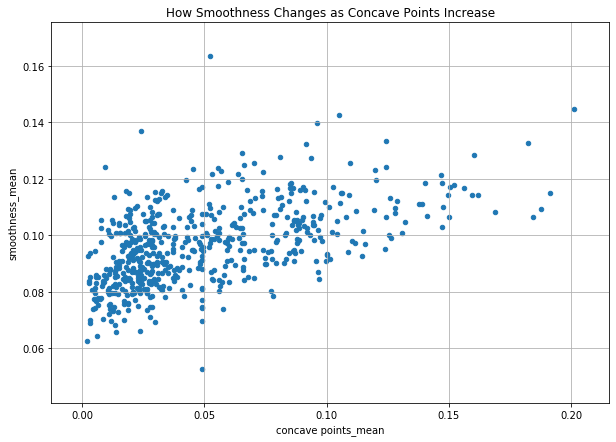

In [51]:
# smoothness vs concave points scatter plot
breastcancer.plot(kind='scatter', grid=False,
               x='concave points_mean', y='smoothness_mean', figsize=(10,7))
plt.title('How Smoothness Changes as Concave Points Increase')
plt.grid()
plt.show()

In [52]:
stats.pearsonr(breastcancer['smoothness_mean'], breastcancer['concave points_mean'])

(0.5413808680463119, 1.2128210799523755e-44)

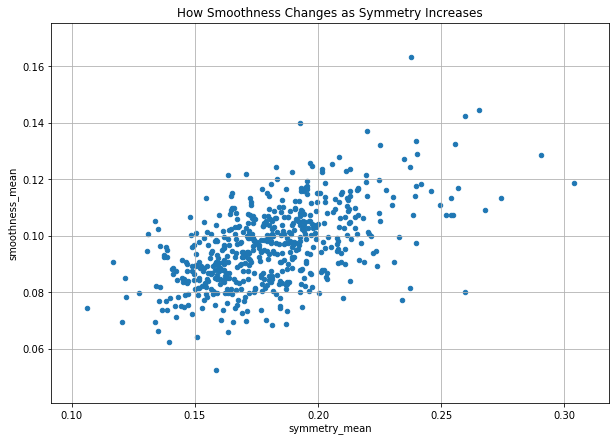

In [53]:
# smoothness/symmetry scatter plot
breastcancer.plot(kind='scatter', grid=False,
               x='symmetry_mean', y='smoothness_mean', figsize=(10,7))
plt.title('How Smoothness Changes as Symmetry Increases')
plt.grid()
plt.show()

In [54]:
stats.pearsonr(breastcancer['smoothness_mean'], breastcancer['symmetry_mean'])

(0.5577747880728872, 7.795252788416026e-48)

In [55]:
# Task 3: Data Modelling
# I want to build a classification model predicting if a breast cancer tumour is malignant or benign based on the metrics
# I have explored, including radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
# 'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'.
# load the breastcancer dataset from sklearn
import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [56]:
# slice the dataframe into only containing columns we want
features_mean= list(breastcancer.columns[1:11])

In [57]:
print(features_mean)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [58]:
X = breastcancer.loc[:, features_mean]
y = breastcancer['diagnosis']

In [59]:
# split into test set and training set
# 1. Decision Tree Modelling for 50:50 test and training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [60]:
# check the data shape
print(f"\
number of rows: {breastcancer.shape[0]}\n\
number of columns: {breastcancer.shape[1]}")

number of rows: 569
number of columns: 32


In [61]:
# fit training data with decision tree classifier
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)

In [62]:
# make a prediction on the test data
y_pre = fit.predict(X_test)

In [63]:
# measure Decision Tree confusion matrix
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[166  21]
 [ 12  86]]


In [64]:
# measure classification precision, recall and f1-score
from sklearn.metrics import classification_report

In [65]:
report = classification_report(y_test, y_pre)
print(report)

              precision    recall  f1-score   support

           B       0.93      0.89      0.91       187
           M       0.80      0.88      0.84        98

    accuracy                           0.88       285
   macro avg       0.87      0.88      0.87       285
weighted avg       0.89      0.88      0.89       285



In [66]:
# building k nearest neighbours for 50/50
# select a KNN classifier. number of samples is 569, so pick K that is the square root of 569 (24 to the closest integer)
clf = KNeighborsClassifier(24)

In [67]:
# fit the data
fit = clf.fit(X_train, y_train)

In [68]:
# predicted is function for unseen data
predicted = fit.predict(X_test)

In [69]:
# confusion matrix made by KNN
confusion_matrix(y_test, predicted)

array([[181,   6],
       [ 23,  75]], dtype=int64)

In [70]:
# 2. split data into 60% for training, 40% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [71]:
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)

In [72]:
# make a prediction on the test data
y_pre = fit.predict(X_test)

In [73]:
# measure Decision Tree confusion matrix
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[137  11]
 [ 12  68]]


In [74]:
report = classification_report(y_test, y_pre)
print(report)

              precision    recall  f1-score   support

           B       0.92      0.93      0.92       148
           M       0.86      0.85      0.86        80

    accuracy                           0.90       228
   macro avg       0.89      0.89      0.89       228
weighted avg       0.90      0.90      0.90       228



In [75]:
# building k nearest neighbours for 60/40
# select a KNN classifier. number of samples is 569, so pick K that is the square root of 569 (24 to the closest integer)
clf = KNeighborsClassifier(24)

In [76]:
# fit the data
fit = clf.fit(X_train, y_train)

In [77]:
# predicted is function for unseen data
predicted = fit.predict(X_test)

In [78]:
# confusion matrix made by KNN
confusion_matrix(y_test, predicted)

array([[147,   1],
       [ 16,  64]], dtype=int64)

In [79]:
# 3. split data into 80% for training, 20% for testing Decision Tree Modelling 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state=42)

In [80]:
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)

In [81]:
# make a prediction on the test data
y_pre = fit.predict(X_test)

In [82]:
# measure Decision Tree confusion matrix
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[68  3]
 [ 3 40]]


In [83]:
report = classification_report(y_test, y_pre)
print(report)

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [84]:
# visualising the breastcancer dataset
from sklearn import tree

In [85]:
# building k nearest neighbours for 80/20
# select a KNN classifier. number of samples is 569, so pick K that is the square root of 569 (24 to the closest integer)
clf = KNeighborsClassifier(24)

In [86]:
# fit the data
fit = clf.fit(X_train, y_train)

In [87]:
# predicted is function for unseen data
predicted = fit.predict(X_test)

In [88]:
# confusion matrix made by KNN
confusion_matrix(y_test, predicted)

array([[71,  0],
       [ 7, 36]], dtype=int64)